In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras import layers, losses, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import tensorflow as tf
pd.set_option("display.max_rows", None, "display.max_columns", None)
#import tensorflow as tf

In [ ]:
with open('/content/drive/MyDrive/mHealth/project2/ascending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    asc_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/dancing.csv', 'r', encoding='utf-8-sig') as f: 
    dance_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/descending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    des_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/jumping.csv', 'r', encoding='utf-8-sig') as f: 
    jump_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/sitting.csv', 'r', encoding='utf-8-sig') as f: 
    sit_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/standing.csv', 'r', encoding='utf-8-sig') as f: 
    stand_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/walking.csv', 'r', encoding='utf-8-sig') as f: 
    walk_data = np.genfromtxt(f,delimiter = ',')


with open('/content/drive/MyDrive/mHealth/project2/eating.csv', 'r', encoding='utf-8-sig') as f: 
    eat_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups on floor.csv', 'r', encoding='utf-8-sig') as f: 
    pushf_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups against wall.csv', 'r', encoding='utf-8-sig') as f: 
    pushg_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/working on laptop.csv', 'r', encoding='utf-8-sig') as f: 
    laptop_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/running.csv', 'r', encoding='utf-8-sig') as f: 
    run_data = np.genfromtxt(f,delimiter = ',')


In [ ]:
def normalize_data(data):
    minimum = np.min(data,axis = 0)
    maximum = np.max(data,axis = 0)
    norm_data = (data - minimum) / (maximum - minimum)
    return norm_data

In [ ]:
asc_data = normalize_data(asc_data)
dance_data = normalize_data(dance_data)
des_data = normalize_data(des_data)
jump_data = normalize_data(jump_data)
sit_data = normalize_data(sit_data)
stand_data = normalize_data(stand_data)
walk_data = normalize_data(walk_data)


eat_data = normalize_data(eat_data)
pushf_data = normalize_data(pushf_data)
pushg_data = normalize_data(pushg_data)
laptop_data = normalize_data(laptop_data)
run_data = normalize_data(run_data)


full_data = np.concatenate([asc_data,dance_data,des_data,jump_data,sit_data,stand_data,walk_data,eat_data,pushf_data,pushg_data,laptop_data,run_data],axis = 0)
full_data.shape

(14280, 6, 12)

In [ ]:
def features_calc(sensor_segment):
    """
    Here, the sensor segment is one axis of a sensor.
    """
    features = np.zeros(9) # we extract nine features
    
    # the first feature is the amplitude
    features[0] = np.max(sensor_segment) - np.mean(sensor_segment)
    
    # the second feature is the median
    features[1] = np.median(sensor_segment)
    
    # the third feature is the mean
    features[2] = np.mean(sensor_segment)
    
    # the fourth feature is the max value
    features[3] = np.max(sensor_segment)
    
    # the fifth feature is the min value
    features[4] = np.min(sensor_segment)
    
    # the sixth feature is the peak to peak value
    features[5] = features[3] - features[4]
    
    # the seventh feature is the standard deviation
    features[6] = np.std(sensor_segment)
    
    # the eighth feature is the RMS value
    features[7] = np.sqrt(np.mean(sensor_segment**2))
    
    # the ninth feature is the stand to end value
    features[8] = sensor_segment[0] - sensor_segment[1]
    #features[0] = sensor_segment[0]
    
    return features

In [ ]:
def get_features(data):
    final_data = []
    for i in range(data.shape[0]):
        example = []
        for j in range(data.shape[2]):
            segment = data[i,:,j]
            features = features_calc(segment)
            example.extend(features)
        final_data.append(example)
    return np.array(final_data)

In [ ]:
def get_segments(data):
    #here data is expected to be of 14280 samples (or multiples of 238) as I am segmenting 2 seconds of sensor data for one example
    segments = np.split(data,np.arange(0,14280,119*2)[1:])
    return np.array(segments)


In [ ]:
asc_data_segments = get_segments(asc_data)
des_data_segments = get_segments(des_data)
dance_data_segments = get_segments(dance_data)
jump_data_segments = get_segments(jump_data)
sit_data_segments = get_segments(sit_data)
stand_data_segments = get_segments(stand_data)
walk_data_segments = get_segments(walk_data)

eat_data_segments = get_segments(eat_data)
pushf_data_segments = get_segments(pushf_data)
pushg_data_segments = get_segments(pushg_data)
laptop_data_segments = get_segments(laptop_data)
run_data_segments = get_segments(run_data)

print(asc_data_segments.shape)

(60, 238, 6)


In [ ]:
asc_data_features = get_features(asc_data_segments)
des_data_features = get_features(des_data_segments)
dance_data_features = get_features(dance_data_segments)
jump_data_features = get_features(jump_data_segments)
sit_data_features = get_features(sit_data_segments)
stand_data_features = get_features(stand_data_segments)
walk_data_features = get_features(walk_data_segments)

eat_data_features = get_features(eat_data_segments)
pushf_data_features = get_features(pushf_data_segments)
pushg_data_features = get_features(pushg_data_segments)
laptop_data_features = get_features(laptop_data_segments)
run_data_features = get_features(run_data_segments)

print(asc_data_features.shape)

(60, 54)


In [ ]:
#preparing train, validation and test data and labels
activities = ['asc_data','des_data','dance_data','jump_data','sit_data','stand_data','walk_data','eat_data','pushf_data','pushg_data','laptop_data','run_data']
activity_length = [len(asc_data_features),len(des_data_features),len(dance_data_features),len(jump_data_features),len(sit_data_features),len(stand_data_features),len(walk_data_features),
                   len(eat_data_features),len(pushf_data_features),len(pushg_data_features),len(laptop_data_features),len(run_data_features)]
activity_id = np.arange(len(activities))
labels = []
for i,id in enumerate(activity_id):
    labels.extend(np.full(activity_length[i],id))
labels = np.array(labels)
full_features = np.concatenate([asc_data_features,des_data_features,dance_data_features,jump_data_features,sit_data_features,stand_data_features,walk_data_features,
                                eat_data_features,pushf_data_features,pushg_data_features,laptop_data_features,run_data_features],axis = 0)
x_train,x_test,y_train,y_test = train_test_split(full_features,labels,test_size = 0.2,random_state = 2, shuffle = True)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.2,random_state = 2, shuffle = True)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)



(460, 54)
(116, 54)
(144, 54)
(460,)
(116,)
(144,)


In [ ]:
class activity_detector(Model):
  def __init__(self):
    super(activity_detector, self).__init__()
    self.forward_pass = Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(12, activation="softmax")])
    
  def call(self, x):
    fp = self.forward_pass(x)
    return fp


In [ ]:
model = activity_detector()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train,epochs=50,batch_size=2,validation_data=(x_valid, y_valid),shuffle=True)

Epoch 1/50
230/230 [==============================] - 1s 3ms/step - loss: 2.3745 - accuracy: 0.2043 - val_loss: 2.1476 - val_accuracy: 0.1552
Epoch 2/50
230/230 [==============================] - 1s 2ms/step - loss: 1.8183 - accuracy: 0.3935 - val_loss: 1.6502 - val_accuracy: 0.3793
Epoch 3/50
230/230 [==============================] - 1s 2ms/step - loss: 1.3788 - accuracy: 0.5717 - val_loss: 1.2651 - val_accuracy: 0.6293
Epoch 4/50
230/230 [==============================] - 1s 2ms/step - loss: 1.0822 - accuracy: 0.7043 - val_loss: 1.0563 - val_accuracy: 0.6983
Epoch 5/50
230/230 [==============================] - 1s 2ms/step - loss: 0.8534 - accuracy: 0.7522 - val_loss: 0.8589 - val_accuracy: 0.7241
Epoch 6/50
230/230 [==============================] - 1s 3ms/step - loss: 0.7330 - accuracy: 0.7891 - val_loss: 0.8046 - val_accuracy: 0.7328
Epoch 7/50
230/230 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.8065 - val_loss: 0.6515 - val_accuracy: 0.8103
Epoch 

Plotting loss for each epoch

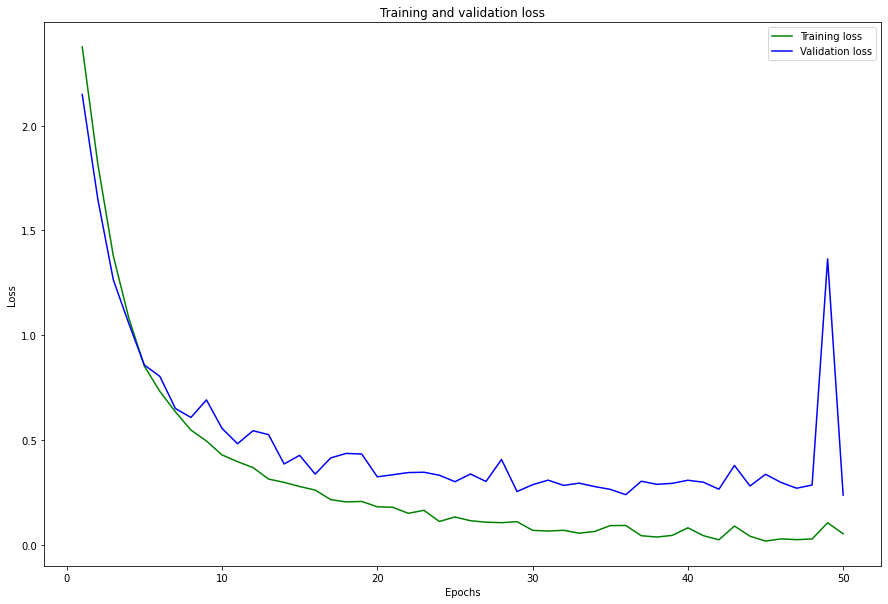

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting accuracy for each epoch

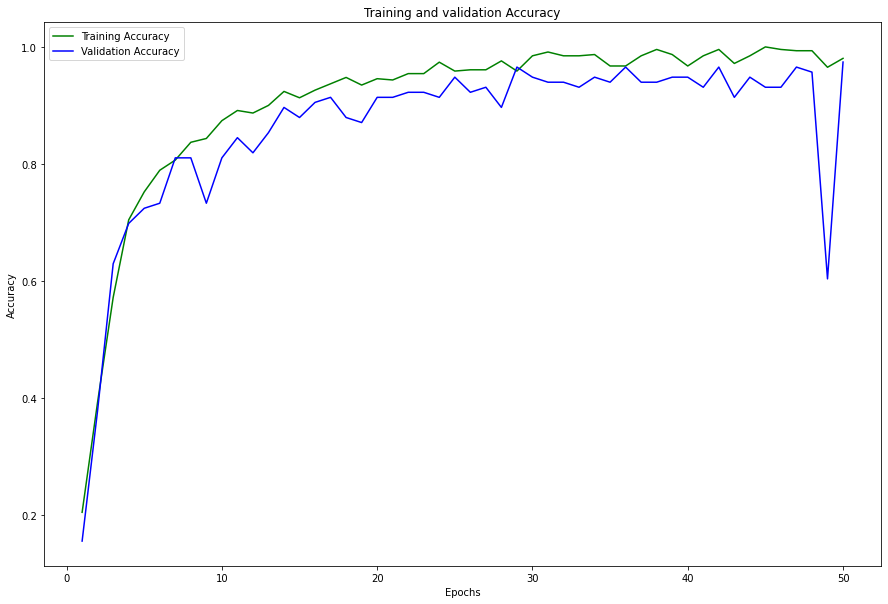

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions = predictions.astype(int)
accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test,predictions,average = 'weighted')
recall = recall_score(y_test,predictions,average = 'weighted')
f1 = f1_score(y_test,predictions,average = 'weighted')
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = activities
conf_mat.index = activities
print('accuracy:', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f1_score: ', f1)
print('Confusion Matrix: \n', conf_mat)

accuracy: 0.9791666666666666
Precision:  0.9803766835016836
Recall:  0.9791666666666666
f1_score:  0.9792122787812443
Confusion Matrix: 
              asc_data  des_data  dance_data  jump_data  sit_data  stand_data  \
asc_data           10         0           0          0         0           0   
des_data            0        10           0          0         0           0   
dance_data          0         0          12          0         0           0   
jump_data           0         0           0         15         0           0   
sit_data            0         0           0          0        14           0   
stand_data          0         0           0          0         0           9   
walk_data           0         0           0          0         0           0   
eat_data            0         0           0          0         0           0   
pushf_data          0         1           0          0         0           0   
pushg_data          0         0           0          0        

In [ ]:
#code to convert deployable model - code is referred from IMU TinyML mheath note book used in class discussions
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)


# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
quant_model = converter.convert()
open("quantized.tflite", "wb").write(quant_model)


import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("quantized.tflite")
print("Model is %d bytes" % quantized_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpke5ufzop/assets


INFO:tensorflow:Assets written to: /tmp/tmpke5ufzop/assets


INFO:tensorflow:Assets written to: /tmp/tmp0v8amqdm/assets


INFO:tensorflow:Assets written to: /tmp/tmp0v8amqdm/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Model is 19632 bytes
Model is 7936 bytes


In [ ]:
!apt-get install xxd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xxd
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 49.9 kB of archives.
After this operation, 201 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.8 [49.9 kB]
Fetched 49.9 kB in 1s (91.1 kB/s)
Selecting previously unselected package xxd.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!echo "const unsigned char model[] = {" >model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 121,098 bytes.


In [ ]:
!echo "const unsigned char model[] = {" >model1.h
!cat quantized.tflite | xxd -i      >> model1.h
!echo "};"                              >> model1.h

import os
model_h_size = os.path.getsize("model1.h")
print(f"Header file, model1.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model1.h, is 48,974 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
